# Exercício 3
Utilizando o dataset zoo.csv (disponível no repositório da disciplina), faça
a classificação de todas as amostras dos animais presentes.

Avalie a precisão, a acurácia e o melhor ‘k’ para este problema.

### 1 - Vamos importar algumas bibliotecas que iremos utilizar nesse exercício

In [22]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt

### 2 - Vamos ler o conjunto de dados utilizando a função read_csv() do pacote Pandas

In [23]:
zoo = pd.read_csv('zoo.csv', sep=',')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### 3 - Análise do dataset

In [24]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [25]:
print('\033[1;36mVerificar valores faltantes: \033[0;0m')
zoo.isna().sum()

Verificar valores faltantes: 


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [26]:
print('\033[1;36mVerificar valores duplicados: \033[0;0m')
zoo[zoo.duplicated()]

Verificar valores duplicados: 


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type


In [27]:
print('\033[1;36mVamos remover a coluna animal_name: \033[0;0m')
zoo.drop(['animal_name'], axis=1, inplace=True)
zoo.head()

Vamos remover a coluna animal_name: 


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### 4 - Modelo de Classificação KNN

Separar a variável target das variáveis de treinamento

In [28]:
X = zoo.iloc[:,0:-1].values
y = zoo.iloc[:,-1].values

print(X)
print(y)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]]
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


Normalizar e dividir o dataset em treino e teste

In [35]:
Xold = X
XNew = StandardScaler().fit_transform(X)
X = XNew
X

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 15)

Classif_KNN = KNeighborsClassifier(n_neighbors=5)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)

Avaliando o modelo

In [42]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00        11
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.84      0.79      0.80        31
weighted avg       0.94      0.94      0.93        31

0.9354838709677419


Testar valor de K (entre 1 e 26)

In [43]:
k_range = range(1, 26)

scores = []

In [44]:
print('\033[1;36mFaz um loop de 1 a 26 armazena no dicionário scores: \033[0;0m')

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print(scores)    

Faz um loop de 1 a 26 armazena no dicionário scores: 
[0.967741935483871, 0.9032258064516129, 0.967741935483871, 0.967741935483871, 0.9354838709677419, 0.8709677419354839, 0.9032258064516129, 0.9354838709677419, 0.9354838709677419, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.8709677419354839, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.7419354838709677, 0.7096774193548387, 0.6774193548387096]


Plot dos valores de acc. em função do valor escolhido de K

Text(0, 0.5, 'Valores Acurácia')

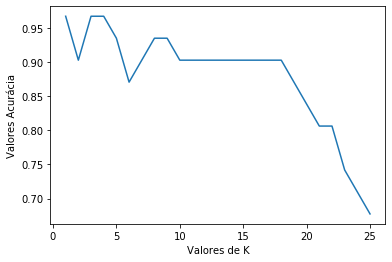

In [45]:
plt.plot(k_range, scores)
plt.xlabel('Valores de K')
plt.ylabel('Valores Acurácia')

In [46]:
Classif_KNN = KNeighborsClassifier(n_neighbors=3)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.99      0.93      0.95        31
weighted avg       0.97      0.97      0.96        31

0.967741935483871


## Podemos verificar que o melhor valor de K está entre 3 e 4, com uma acurácia de 96,77%